In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score

# Observe Data

In [4]:
df = pd.read_csv('steam_games.csv')
pd.set_option('display.max_columns', None)

In [5]:
df.head(5)

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://counter-strike.net/,NaN,NaN,True,False,True,0,NaN,1,4111974,Includes intense violence and blood.,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']","[{'title': 'Buy Counter-Strike 2', 'descriptio...",['Valve'],['Valve'],"['Multi-player', 'Cross-Platform Multiplayer',...","['Action', 'Free to Play']",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,7024836,1029779,100000000 - 200000000,29018,753,6078,352,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.pubg.com,https://support.playbattlegrounds.com,NaN,True,False,False,0,NaN,37,1701431,NaN,"['English', 'Korean', 'Simplified Chinese', 'F...",[],[],"['KRAFTON, Inc.']","['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1379580,981860,50000000 - 100000000,0,0,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dota2.com/,NaN,NaN,True,True,True,90,https://www.metacritic.com/game/pc/dota-2?ftag...,0,14329,NaN,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...","[{'title': 'Buy Dota 2', 'description': '', 's...",['Valve'],['Valve'],"['Multi-player', 'Co-op', 'Steam Trading Cards...","['Action', 'Strategy', 'Free to Play']",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1832477,406030,200000000 - 500000000,35557,1327,1163,977,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832
3,271590,Grand Theft Auto V,2015-04-13,17,0.00,1,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,https://shared.akamai.steamstatic.com/store_it...,http://www.rockstargames.com/V/,https://support.rockstargames.com,NaN,True,False,False,96,https://www.metacritic.com/game/pc/grand-theft...,77,1641404,NaN,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Spanish - Latin America']","[{'title': 'Buy Shark Cash Cards', 'descriptio...",['Rockstar North'],['Rockstar Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",['https://shared.akamai.steamstatic.com/store_...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1557234,236827,50000000 - 100000000,12898,590,6910,235,133571,"{'Open World': 31998, 'Action': 2317

In [6]:
df.describe()

,AppID,required_age,price,dlc_count,metacritic_score,achievements,recommendations,user_score,score_rank,positive,negative,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
count,8.364600e+04,83646.000000,83646.000000,83646.000000,83646.000000,83646.000000,8.364600e+04,83646.000000,41.000000,8.364600e+04,8.364600e+04,83646.000000,83646.000000,83646.000000,83646.000000,8.364600e+04,83646.000000,8.364600e+04,83646.000000,83646.000000
mean,1.421850e+06,0.276403,7.492446,0.580542,3.451080,20.702735,1.003478e+03,0.037467,99.121951,1.276726e+03,2.072231e+02,79.663044,3.634364,65.152572,3.744925,9.927115e+01,45.985223,1.345631e+03,5.596191,18.757430
std,7.480058e+05,2.119835,13.094604,14.179160,15.685104,167.839222,2.108173e+04,1.737074,0.748168,3.057663e+04,5.792324e+03,1018.506902,74.621737,933.278070,82.321592,5.914524e+03,40.607112,3.411672e+04,22.911354,1155.763735
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
25%,7.922225e+05,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,99.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000
50%,1.373005e+06,0.000000,4.990000,0.000000,0.000000,4.000000,0.000000e+00,0.000000,99.000000,1.100000e+01,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,60.000000,1.600000e+01,-1.000000,-1.000000
75%,2.014495e+06,0.000000,9.990000,0.000000,0.000000,20.000000,0.000000e+00,0.000000,100.000000,6.400000e+01,1.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,84.000000,8.700000e+01,-1.000000,-1.000000
max,2.984570e+06,21.000000,999.980000,3165.000000,97.000000,9821.000000,4.111974e+06,100.000000,100.000000,7.024836e+06,1.029779e+06,95816.000000,6836.000000,110101.000000,9874.000000,1.362469e+06,100.000000,8.071426e+06,100.000000,321958.000000


In [7]:
df.columns

Index(['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'peak_ccu', 'tags',
       'pct_pos_total', 'num_reviews_total', 'pct_pos_recent',
       'num_reviews_recent'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83646 entries, 0 to 83645
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AppID                     83646 non-null  int64  
 1   name                      83643 non-null  object 
 2   release_date              83646 non-null  object 
 3   required_age              83646 non-null  int64  
 4   price                     83646 non-null  float64
 5   dlc_count                 83646 non-null  int64  
 6   detailed_description      83480 non-null  object 
 7   about_the_game            83458 non-null  object 
 8   short_description         83537 non-null  object 
 9   reviews                   10283 non-null  object 
 10  header_image              83646 non-null  object 
 11  website                   39760 non-null  object 
 12  support_url               42081 non-null  object 
 13  support_email             73067 non-null  object 
 14  window

In [9]:
df.isna().sum()

AppID                           0
name                            3
release_date                    0
required_age                    0
price                           0
dlc_count                       0
detailed_description          166
about_the_game                188
short_description             109
reviews                     73363
header_image                    0
website                     43886
support_url                 41565
support_email               10579
windows                         0
mac                             0
linux                           0
metacritic_score                0
metacritic_url              79706
achievements                    0
recommendations                 0
notes                       69437
supported_languages             0
full_audio_languages            0
packages                        0
developers                      0
publishers                      0
categories                      0
genres                          0
screenshots   

# Data Cleaning

In [11]:
df.head(5)

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://counter-strike.net/,NaN,NaN,True,False,True,0,NaN,1,4111974,Includes intense violence and blood.,"['Czech', 'Danish', 'Dutch', 'English', 'Finni...","['English', 'Vietnamese']","[{'title': 'Buy Counter-Strike 2', 'descriptio...",['Valve'],['Valve'],"['Multi-player', 'Cross-Platform Multiplayer',...","['Action', 'Free to Play']",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,7024836,1029779,100000000 - 200000000,29018,753,6078,352,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.pubg.com,https://support.playbattlegrounds.com,NaN,True,False,False,0,NaN,37,1701431,NaN,"['English', 'Korean', 'Simplified Chinese', 'F...",[],[],"['KRAFTON, Inc.']","['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1379580,981860,50000000 - 100000000,0,0,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dota2.com/,NaN,NaN,True,True,True,90,https://www.metacritic.com/game/pc/dota-2?ftag...,0,14329,NaN,"['Bulgarian', 'Czech', 'Danish', 'Dutch', 'Eng...","['English', 'Korean', 'Simplified Chinese', 'V...","[{'title': 'Buy Dota 2', 'description': '', 's...",['Valve'],['Valve'],"['Multi-player', 'Co-op', 'Steam Trading Cards...","['Action', 'Strategy', 'Free to Play']",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1832477,406030,200000000 - 500000000,35557,1327,1163,977,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832
3,271590,Grand Theft Auto V,2015-04-13,17,0.00,1,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,https://shared.akamai.steamstatic.com/store_it...,http://www.rockstargames.com/V/,https://support.rockstargames.com,NaN,True,False,False,96,https://www.metacritic.com/game/pc/grand-theft...,77,1641404,NaN,"['English', 'French', 'Italian', 'German', 'Sp...","['English', 'Spanish - Latin America']","[{'title': 'Buy Shark Cash Cards', 'descriptio...",['Rockstar North'],['Rockstar Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",['https://shared.akamai.steamstatic.com/store_...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1557234,236827,50000000 - 100000000,12898,590,6910,235,133571,"{'Open World': 31998, 'Action': 2317

In [12]:
df.isna().sum()

AppID                           0
name                            3
release_date                    0
required_age                    0
price                           0
dlc_count                       0
detailed_description          166
about_the_game                188
short_description             109
reviews                     73363
header_image                    0
website                     43886
support_url                 41565
support_email               10579
windows                         0
mac                             0
linux                           0
metacritic_score                0
metacritic_url              79706
achievements                    0
recommendations                 0
notes                       69437
supported_languages             0
full_audio_languages            0
packages                        0
developers                      0
publishers                      0
categories                      0
genres                          0
screenshots   

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83646 entries, 0 to 83645
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AppID                     83646 non-null  int64  
 1   name                      83643 non-null  object 
 2   release_date              83646 non-null  object 
 3   required_age              83646 non-null  int64  
 4   price                     83646 non-null  float64
 5   dlc_count                 83646 non-null  int64  
 6   detailed_description      83480 non-null  object 
 7   about_the_game            83458 non-null  object 
 8   short_description         83537 non-null  object 
 9   reviews                   10283 non-null  object 
 10  header_image              83646 non-null  object 
 11  website                   39760 non-null  object 
 12  support_url               42081 non-null  object 
 13  support_email             73067 non-null  object 
 14  window

In [14]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
print(df['release_date'].head())

0   2012-08-21
1   2017-12-21
2   2013-07-09
3   2015-04-13
4   2015-12-01
Name: release_date, dtype: datetime64[ns]


In [15]:
# Columns to fill
columns_to_fill = ['name', 'about_the_game', 'developers', 'publishers', 'categories', 'genres', 'tags']
df[columns_to_fill] = df[columns_to_fill].fillna('Unknown')

In [16]:
columns_to_drop = [
    'AppID',
    'detailed_description',
    'about_the_game',
    'short_description',
    'reviews',
    'header_image',
    'website',
    'support_url',           
    'support_email',         
    'notes',                 
    'packages',              
    'metacritic_url',        
    'screenshots',           
    'movies',                
    'dlc_count',
    'supported_languages',
    'full_audio_languages',
    'median_playtime_forever',
    'median_playtime_2weeks',
    'score_rank'
]


In [17]:
df = df.drop(columns = columns_to_drop)

In [18]:
df['genres'] = df['genres'].str.replace('[', '').str.replace(']', '')
df['genres']

0                                 'Action', 'Free to Play'
1        'Action', 'Adventure', 'Massively Multiplayer'...
2                     'Action', 'Strategy', 'Free to Play'
3                                    'Action', 'Adventure'
4                                                 'Action'
                               ...                        
83641                        'Casual', 'Indie', 'Strategy'
83642                                  'Indie', 'Strategy'
83643                                              'Indie'
83644                       'Action', 'Adventure', 'Indie'
83645    'Violent', 'Action', 'Adventure', 'Indie', 'St...
Name: genres, Length: 83646, dtype: object

In [19]:
df['estimated_owners'].unique

<bound method Series.unique of 0        100000000 - 200000000
1         50000000 - 100000000
2        200000000 - 500000000
3         50000000 - 100000000
4          20000000 - 50000000
                 ...          
83641                0 - 20000
83642                0 - 20000
83643                0 - 20000
83644                0 - 20000
83645                0 - 20000
Name: estimated_owners, Length: 83646, dtype: object>

In [20]:
# Split the 'estimated_owners' range into two columns: lower and upper bound
df[['lower_bound', 'upper_bound']] = df['estimated_owners'].str.split(' - ', expand=True)

# Convert to numeric
df['lower_bound'] = pd.to_numeric(df['lower_bound'], errors='coerce')
df['upper_bound'] = pd.to_numeric(df['upper_bound'], errors='coerce')

# Calculate the average of the lower and upper bound
df['estimated_owners_avg'] = (df['lower_bound'] + df['upper_bound']) / 2

# Drop the lower and upper bound columns if its not needed
df = df.drop(columns=['estimated_owners','lower_bound', 'upper_bound'])

# Check the result
df['estimated_owners_avg'].head()

0    150000000.0
1     75000000.0
2    350000000.0
3     75000000.0
4     35000000.0
Name: estimated_owners_avg, dtype: float64

In [21]:
df['estimated_owners_avg'].dtypes

dtype('float64')

In [22]:
df.rename(columns={'num_reviews_total': 'user_reviews_total'}, inplace=True)
df.rename(columns={'num_reviews_recent': 'user_reviews_recent'}, inplace=True)

In [23]:
df['user_reviews_total'].head(5)

0    8071426
1    2365012
2    2247365
3    1643791
4    1091695
Name: user_reviews_total, dtype: int64

In [24]:
df.head(5)

,name,release_date,required_age,price,windows,mac,linux,metacritic_score,achievements,recommendations,developers,publishers,categories,genres,user_score,positive,negative,average_playtime_forever,average_playtime_2weeks,peak_ccu,tags,pct_pos_total,user_reviews_total,pct_pos_recent,user_reviews_recent,estimated_owners_avg
0,Counter-Strike 2,2012-08-21,0,0.00,True,False,True,0,1,4111974,['Valve'],['Valve'],"['Multi-player', 'Cross-Platform Multiplayer',...","'Action', 'Free to Play'",0,7024836,1029779,29018,753,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072,150000000.0
1,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,True,False,False,0,37,1701431,"['KRAFTON, Inc.']","['KRAFTON, Inc.']","['Multi-player', 'PvP', 'Online PvP', 'Stats',...","'Action', 'Adventure', 'Massively Multiplayer'...",0,1379580,981860,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517,75000000.0
2,Dota 2,2013-07-09,0,0.00,True,True,True,90,0,14329,['Valve'],['Valve'],"['Multi-player', 'Co-op', 'Steam Trading Cards...","'Action', 'Strategy', 'Free to Play'",0,1832477,406030,35557,1327,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832,350000000.0
3,Grand Theft Auto V,2015-04-13,17,0.00,True,False,False,96,77,1641404,['Rockstar North'],['Rockstar Games'],"['Single-player', 'Multi-player', 'PvP', 'Onli...","'Action', 'Adventure'",0,1557234,236827,12898,590,133571,"{'Open World': 31998, 'Action': 23177, 'Multip...",87,1643791,92,16181,75000000.0
4,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,19.99,True,False,False,0,0,1088708,['Ubisoft Montreal'],['Ubisoft'],"['Single-player', 'Multi-player', 'PvP', 'Onli...",'Action',0,1094330,190046,16213,578,68162,"{'FPS': 9689, 'PvP': 9073, 'e-sports': 9026, '...",85,1091695,77,10566,35000000.0


In [25]:
# Find rows where any column has a value of -1
rows_with_negative_one = df[(df == -1).any(axis=1)]
rows_with_negative_one.head(5)

,name,release_date,required_age,price,windows,mac,linux,metacritic_score,achievements,recommendations,developers,publishers,categories,genres,user_score,positive,negative,average_playtime_forever,average_playtime_2weeks,peak_ccu,tags,pct_pos_total,user_reviews_total,pct_pos_recent,user_reviews_recent,estimated_owners_avg
72,Sunland Hike,2023-09-25,0,1.99,True,False,False,0,2,0,['Morning Shift Studios'],['Morning Shift Studios'],"['Single-player', 'Steam Achievements', 'Famil...","'Adventure', 'Casual', 'Indie'",0,0,0,0,0,0,"{'Adventure': 230, 'Casual': 225, 'Walking Sim...",96,200696,-1,-1,10000.0
73,Lost Dream: Memories,2022-07-08,0,3.99,True,False,True,0,7,0,['Morning Shift Studios'],['Morning Shift Studios'],"['Single-player', 'Steam Achievements', 'Full ...","'Adventure', 'Casual', 'Indie'",0,14,8,0,0,0,"{'Adventure': 98, 'Walking Simulator': 91, 'Cu...",96,200696,-1,-1,10000.0
74,Cozy Trip,2023-09-13,0,1.99,True,False,True,0,2,0,['Morning Shift Studios'],['Morning Shift Studios'],"['Single-player', 'Steam Achievements', 'Famil...","'Adventure', 'Casual', 'Indie'",0,18,1,0,0,0,"{'Adventure': 253, 'Casual': 246, 'Walking Sim...",96,200696,-1,-1,10000.0
75,Leafy Trails: Magic Tree,2023-09-20,0,1.99,True,False,False,0,2,0,['Morning Shift Studios'],['Morning Shift Studios'],"['Single-player', 'Steam Achievements', 'Famil...","'Adventure', 'Casual', 'Indie', 'Simulation'",0,0,0,0,0,0,"{'Adventure': 126, 'Casual': 119, 'Simulation'...",96,200694,-1,-1,10000.0
76,Finnish Roller,2017-01-31,0,0.99,True,False,True,0,0,0,['Tero Lunkka'],['Morning Shift Studios'],"['Single-player', 'Steam Trading Cards', 'Part...","'Action', 'Adventure', 'Casual', 'Indie', 'Sim...",0,77,77,265,0,0,"{'Indie': 121, 'Simulation': 73, 'Casual': 72,...",96,200684,-1,-1,75000.0


In [26]:
df.replace(-1, 0, inplace=True)

In [27]:
df[(df == -1).any(axis=1)]

,name,release_date,required_age,price,windows,mac,linux,metacritic_score,achievements,recommendations,developers,publishers,categories,genres,user_score,positive,negative,average_playtime_forever,average_playtime_2weeks,peak_ccu,tags,pct_pos_total,user_reviews_total,pct_pos_recent,user_reviews_recent,estimated_owners_avg


In [28]:
df.isna().sum()

name                        0
release_date                0
required_age                0
price                       0
windows                     0
mac                         0
linux                       0
metacritic_score            0
achievements                0
recommendations             0
developers                  0
publishers                  0
categories                  0
genres                      0
user_score                  0
positive                    0
negative                    0
average_playtime_forever    0
average_playtime_2weeks     0
peak_ccu                    0
tags                        0
pct_pos_total               0
user_reviews_total          0
pct_pos_recent              0
user_reviews_recent         0
estimated_owners_avg        0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83646 entries, 0 to 83645
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   name                      83646 non-null  object        
 1   release_date              83646 non-null  datetime64[ns]
 2   required_age              83646 non-null  int64         
 3   price                     83646 non-null  float64       
 4   windows                   83646 non-null  bool          
 5   mac                       83646 non-null  bool          
 6   linux                     83646 non-null  bool          
 7   metacritic_score          83646 non-null  int64         
 8   achievements              83646 non-null  int64         
 9   recommendations           83646 non-null  int64         
 10  developers                83646 non-null  object        
 11  publishers                83646 non-null  object        
 12  categories        

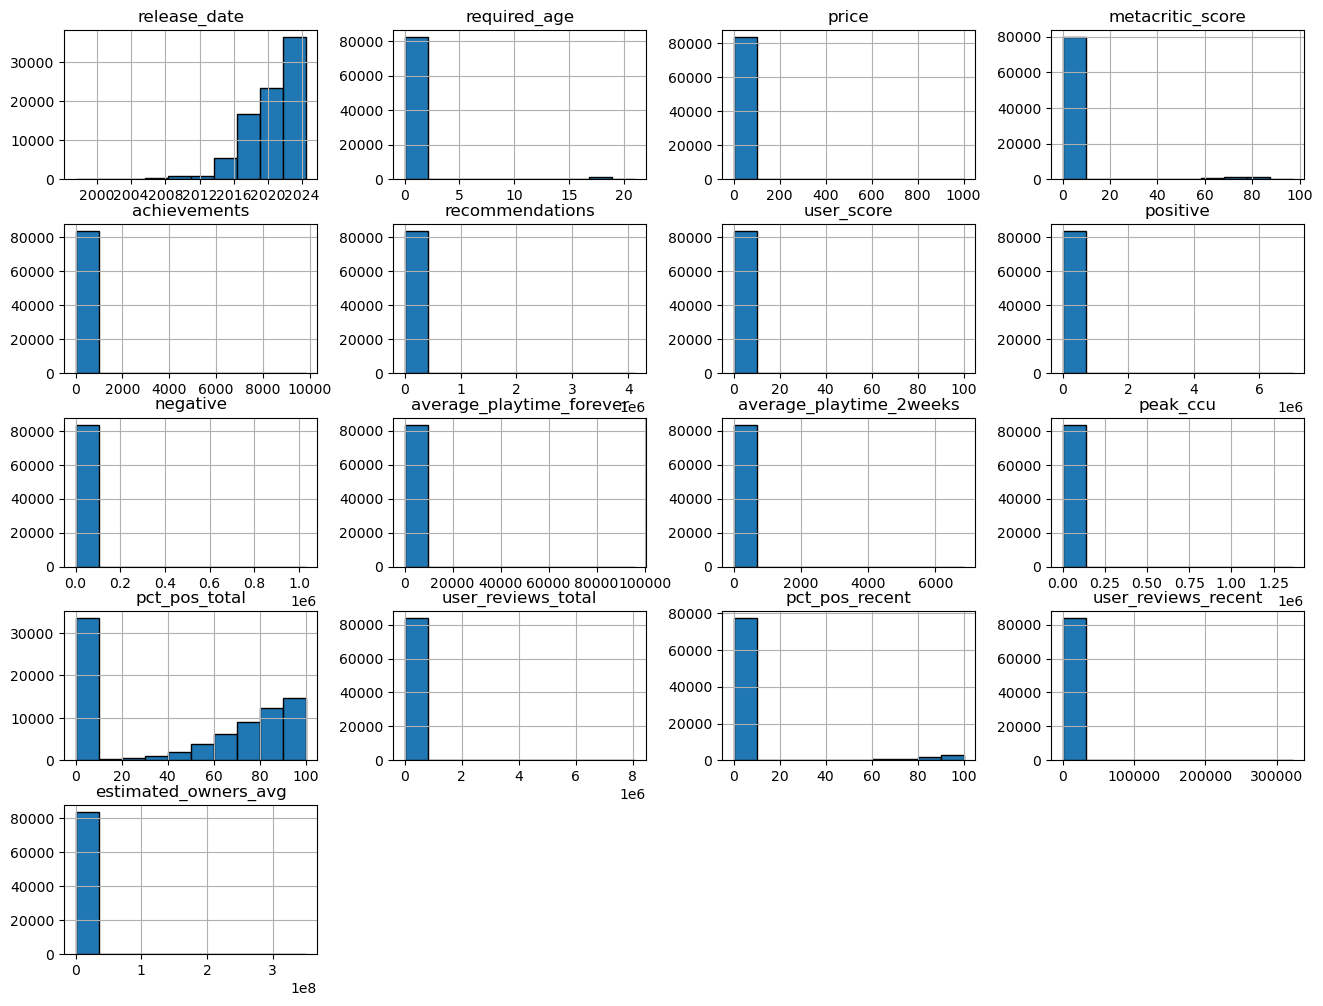

In [30]:
df.hist(figsize = ( 16, 12 ), edgecolor='black')
plt.show()

In [31]:
# We know that there are a lot of games that are in steam, so lets try to find one game
game=df['estimated_owners_avg'].idxmax()
find_game=df.loc[game]
print(find_game)

name                                                                   Dota 2
release_date                                              2013-07-09 00:00:00
required_age                                                                0
price                                                                     0.0
windows                                                                  True
mac                                                                      True
linux                                                                    True
metacritic_score                                                           90
achievements                                                                0
recommendations                                                         14329
developers                                                          ['Valve']
publishers                                                          ['Valve']
categories                  ['Multi-player', 'Co-op', 'Steam Tra

- As you can see on the top, 'Counter-Strike 2' has the highest peak concurrent users (ccu) in steam.

## Exploratory Data Analysis (EDA):

Perform EDA to understand trends, patterns, and anomalies:

## The correlation 

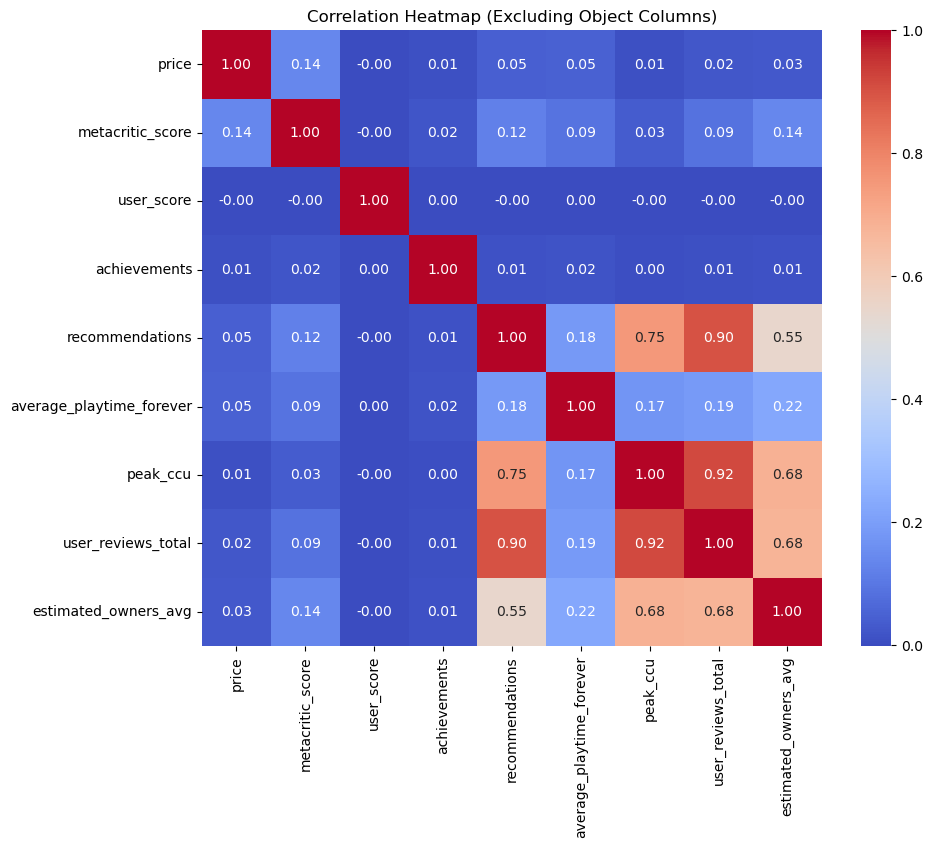

In [35]:
df_copy = df[['price', 'metacritic_score', 'user_score', 'achievements',
              'recommendations', 'average_playtime_forever',
              'peak_ccu', 'user_reviews_total', 'estimated_owners_avg']].copy()
corr_matrix = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Excluding Object Columns)')
plt.show()

- The strongest correlations involve User Reviews, Recommendations, and Peak CCU, indicating that user engagement and player activity are interrelated.

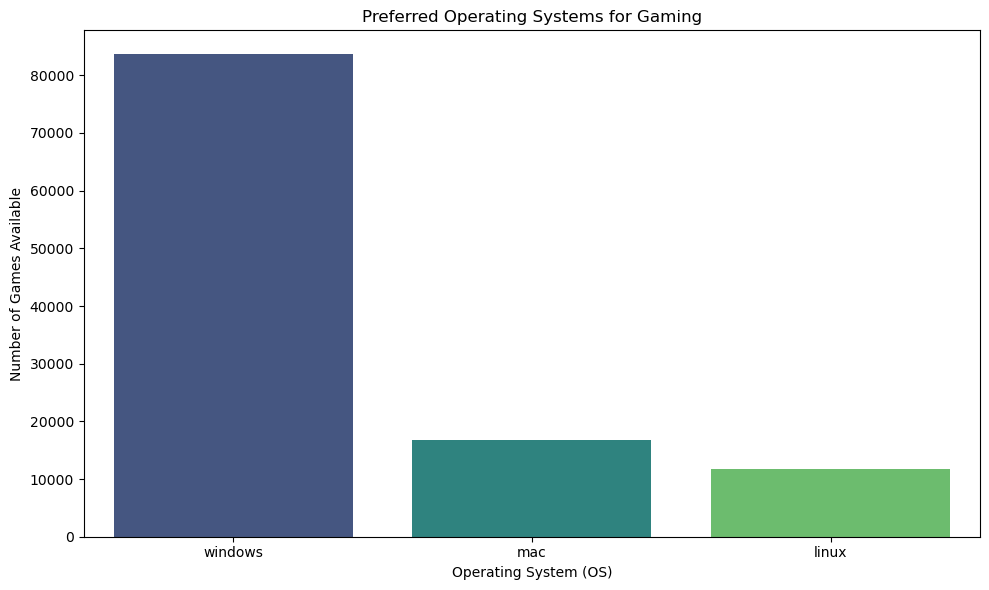

In [37]:
# Now lets check which OS is most preferred for gaming.

os_group = df[['windows', 'mac', 'linux']].sum()
os_group = os_group.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=os_group.index, y=os_group.values, hue=os_group.index, palette='viridis')
plt.title('Preferred Operating Systems for Gaming')
plt.xlabel('Operating System (OS)')
plt.ylabel('Number of Games Available')

plt.tight_layout()
plt.show()

- The graph shows that Windows is the most widely used operating system among gamers. This highlights Windows' dominance in gaming, with significantly more games available for it compared to other platforms.

### Distribution of Game Prices (USD)

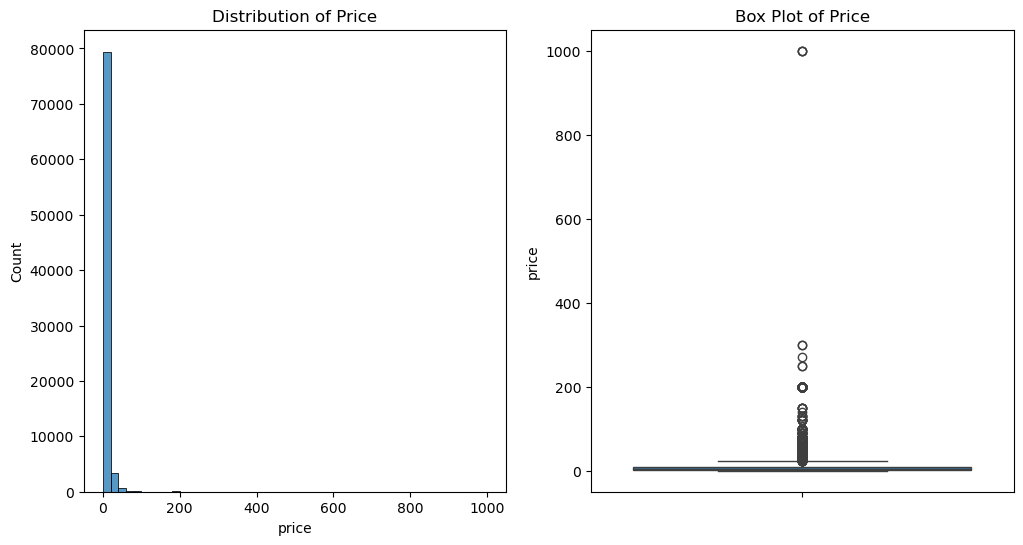

In [39]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins = 50)
plt.title('Distribution of Price')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(df['price'])
plt.title('Box Plot of Price')

plt.show()

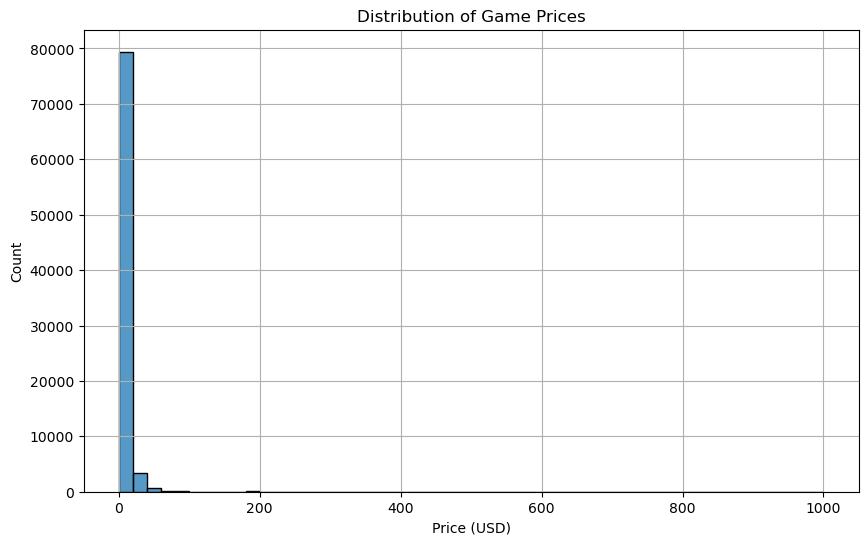

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50)
plt.title('Distribution of Game Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Count')
plt.grid()

plt.show()

- Most games are priced under a specific range, with a noticeable peak at lower prices, indicating that many games are affordable or free.

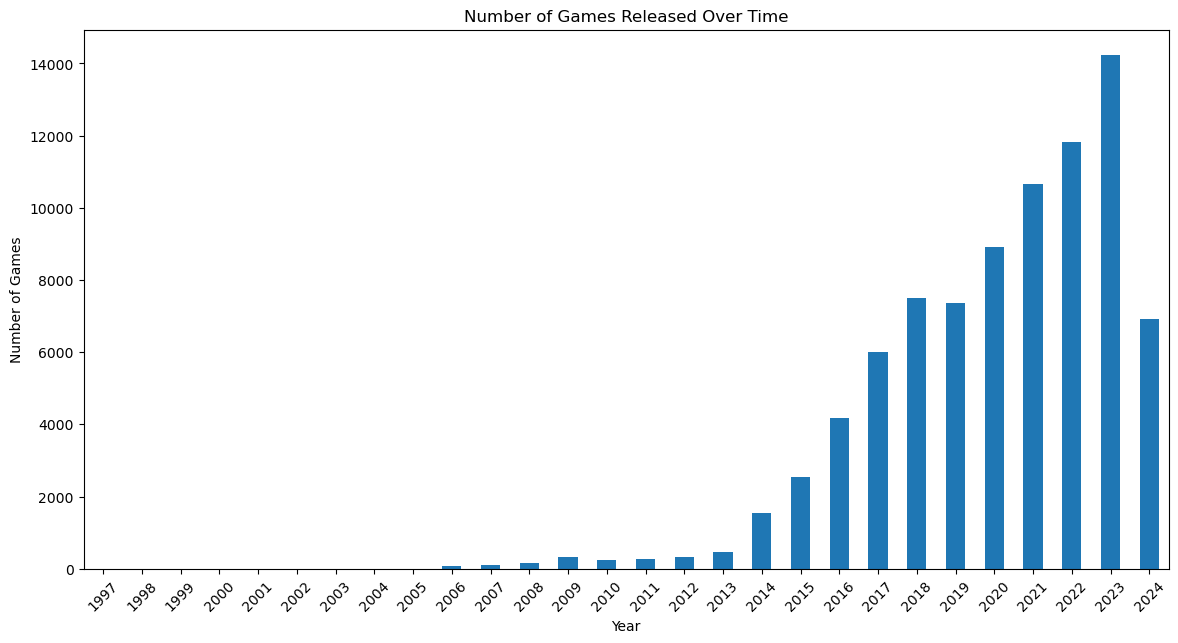

In [43]:
plt.figure(figsize=(14, 7))
df['release_date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Games Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation = 45)
plt.show()

### Analysis based on Genre

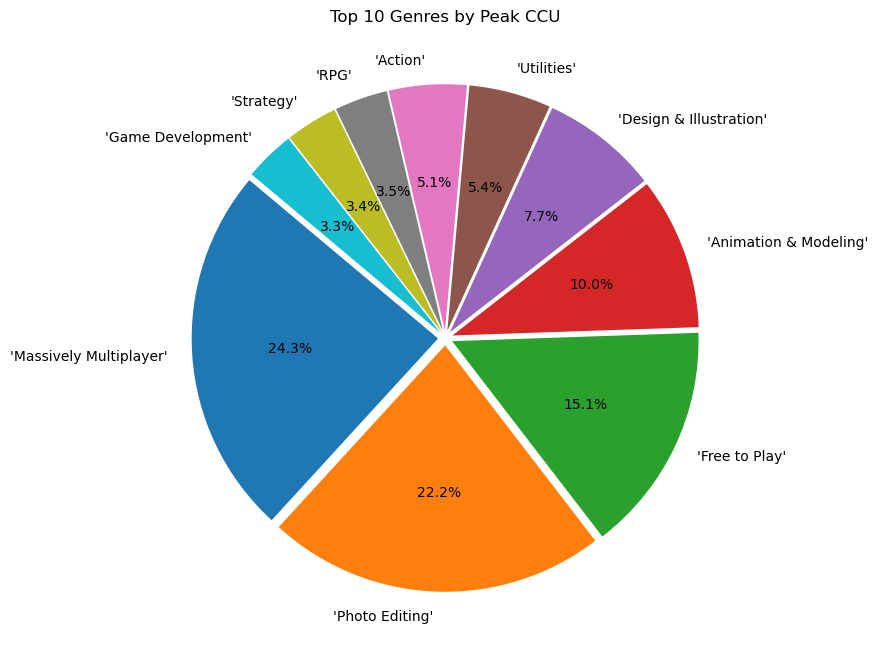

In [45]:
df['genres'] = df['genres'].astype(str)
df_expanded = df.assign(genres=df['genres'].str.split(',')).explode('genres')
df_expanded['genres'] = df_expanded['genres'].str.strip()
peak_ccu_by_genre = df_expanded.groupby('genres')['peak_ccu'].mean()
top_10_genres_peak_ccu = peak_ccu_by_genre.nlargest(10)

# Creating a pie chart
explode = [0.03] * len(top_10_genres_peak_ccu)
plt.figure(figsize=(8, 8))
plt.pie(top_10_genres_peak_ccu, labels=top_10_genres_peak_ccu.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Top 10 Genres by Peak CCU')
plt.show()


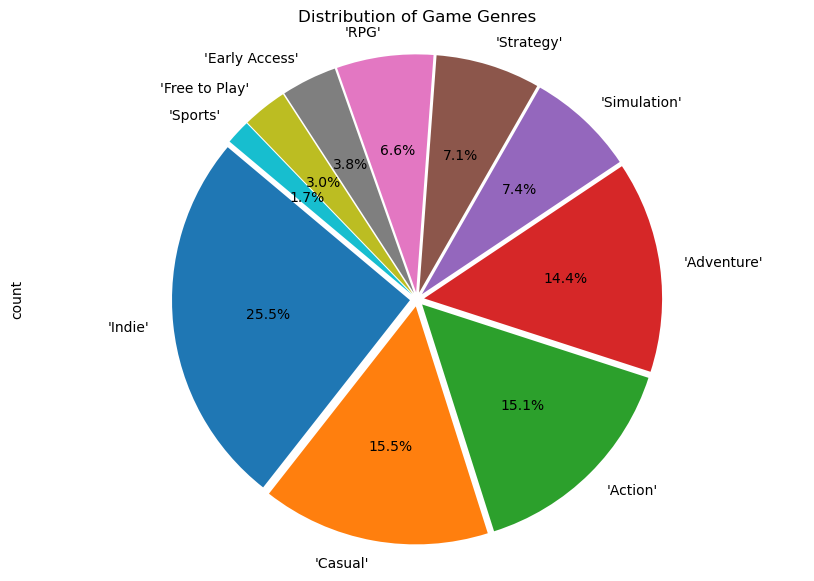

In [46]:
df['genres'] = df['genres'].astype(str)
# Splitting the comma-separated categories and creating a list of all categories
genres_list = df['genres'].str.split(',', expand=True).values.flatten()
genres_list = [genre.strip() for genre in genres_list if genre]
genre_counts = pd.Series(genres_list).value_counts()
genre_counts = genre_counts.head(10)
explode = [0.03] * len(genre_counts)

plt.figure(figsize=(10, 7))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Game Genres')
plt.axis('equal')
plt.show()

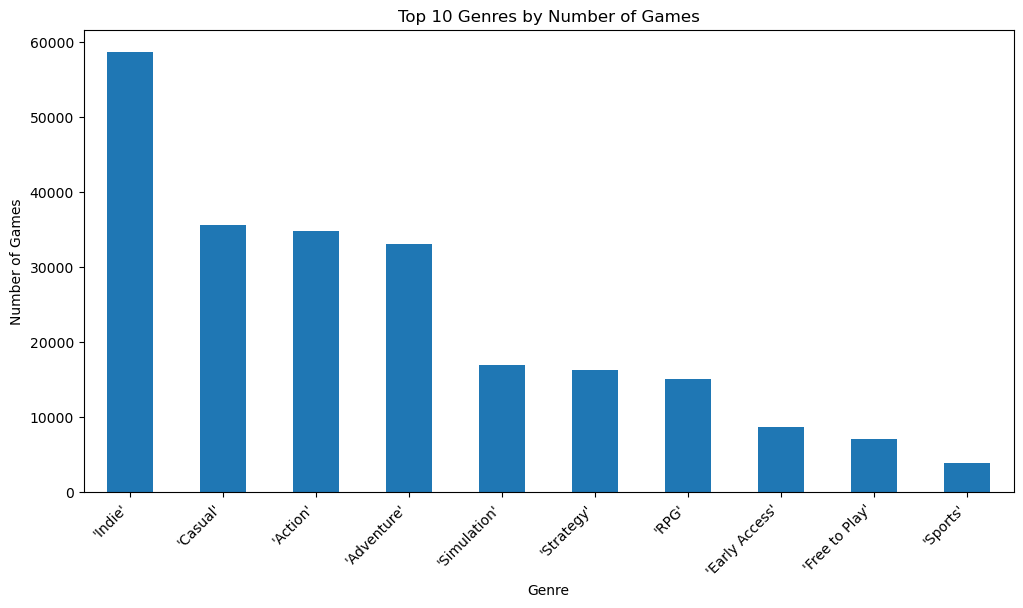

In [47]:
# Distribution of Games by Genre
plt.figure(figsize=(12, 6))
df_expanded['genres'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres by Number of Games')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation = 45, ha = 'right')
plt.show()


### Obeservations:
- The majority of games fall under the Indie category.
- Games in the Action, Adventure, and RPG genres receive the most positive and negative ratings, indicating that these genres tend to evoke strong reactions, either highly favorable or highly unfavorable.


### Analysis based on Categories

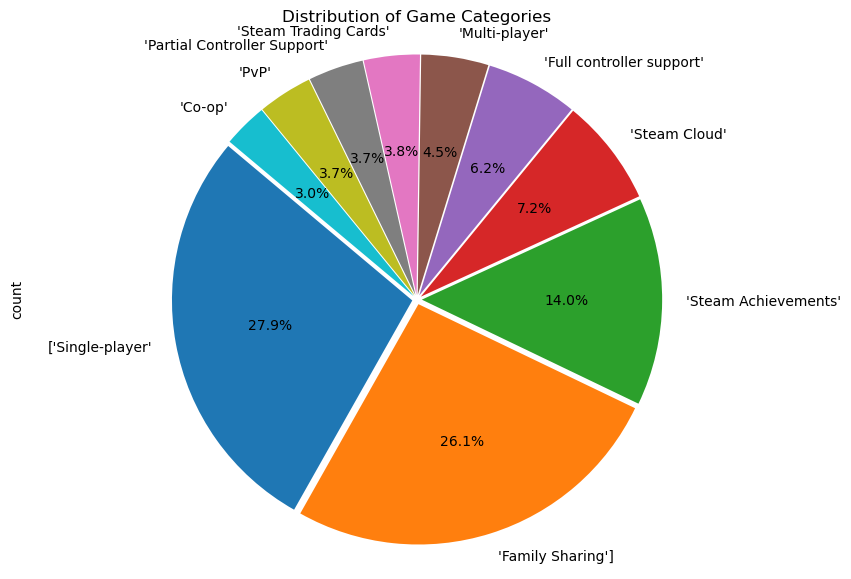

In [50]:
df['categories'] = df['categories'].astype(str)
categories_list = df['categories'].str.split(',', expand=True).values.flatten()
categories_list = [category.strip() for category in categories_list if category]
category_counts = pd.Series(categories_list).value_counts()
category_counts = category_counts.head(10)
explode = [0.02] * len(category_counts)

plt.figure(figsize=(10, 7))
category_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Game Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [51]:
category_counts

['Single-player'                75493
'Family Sharing']               70436
'Steam Achievements'            37794
'Steam Cloud'                   19515
'Full controller support'       16702
'Multi-player'                  12209
'Steam Trading Cards'           10161
'Partial Controller Support'    10021
'PvP'                            9904
'Co-op'                          8077
Name: count, dtype: int64

- Single-player games dominate with 27.9%, the largest portion of games in the dataset is tagged as single-player, indicating a significant preference for or availability of single-player experiences on Steam.

### Analysis based on Top 10 Most Recommended Games

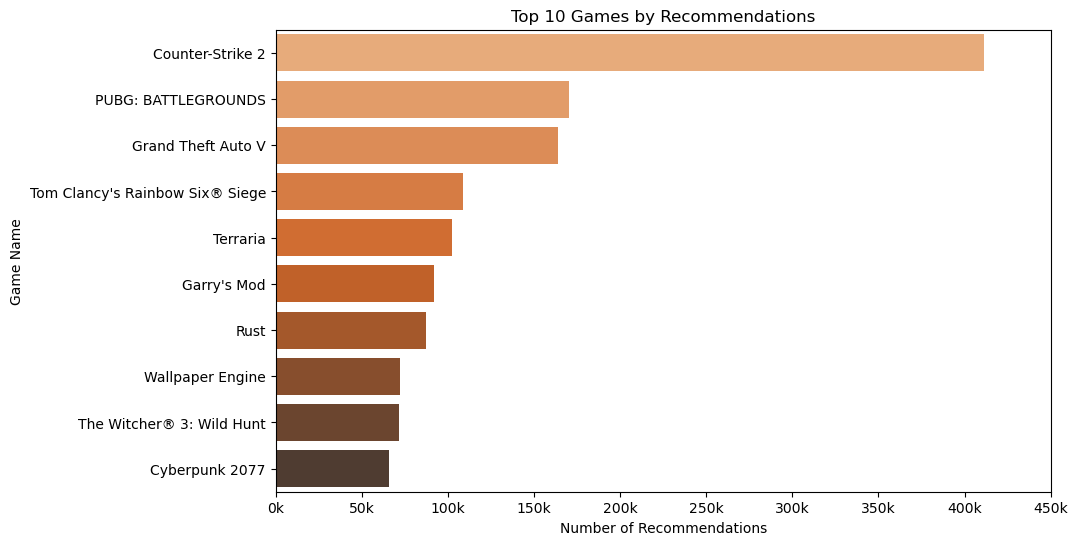

In [53]:
top_games_recommendations = df.sort_values(by='recommendations', ascending=False).head(10)

# Bar plot for Recommendations
plt.figure(figsize=(10, 6))
sns.barplot(x='recommendations', y='name', hue = 'name', data=top_games_recommendations, palette='Oranges_d')
plt.title('Top 10 Games by Recommendations')
plt.xlabel('Number of Recommendations')
plt.ylabel('Game Name')
plt.gca().set_xticks(plt.gca().get_xticks())
plt.gca().set_xticklabels([f'{int(x/1e4)}k' for x in plt.gca().get_xticks()])

plt.show()

In [54]:
top_games_recommendations.groupby('name')['recommendations'].sum().sort_values(ascending=False)

name
Counter-Strike 2                   4111974
PUBG: BATTLEGROUNDS                1701431
Grand Theft Auto V                 1641404
Tom Clancy's Rainbow Six® Siege    1088708
Terraria                           1023411
Garry's Mod                         917851
Rust                                872293
Wallpaper Engine                    719738
The Witcher® 3: Wild Hunt           717273
Cyberpunk 2077                      660641
Name: recommendations, dtype: int64

#### Observation
- Counter Strike 2 has the most number of recommendations. Following by PUBG, GTAV, R6 and other games in the graph

### Analysis based on The Top 10 Most Reviewed Games

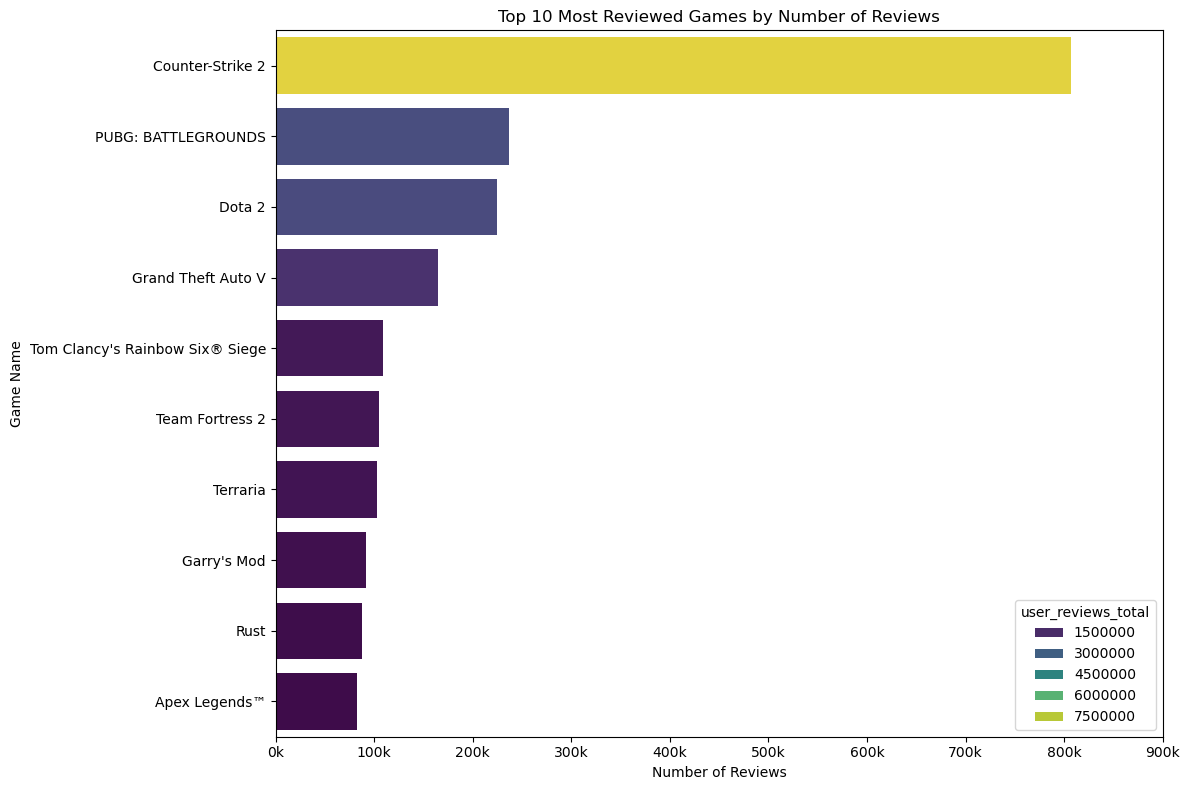

In [57]:
# Sort the DataFrame by the 'positive' column (or 'pct_pos_total' if available) to get the top 10 most positive games
top_10_highest_reviewed_games = df.sort_values(by='user_reviews_total', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_highest_reviewed_games['user_reviews_total'], y=top_10_highest_reviewed_games['name'],  hue = top_10_highest_reviewed_games['user_reviews_total'], palette='viridis')

# Add title and labels
plt.title('Top 10 Most Reviewed Games by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Game Name')
plt.gca().set_xticks(plt.gca().get_xticks())
plt.gca().set_xticklabels([f'{int(x/1e4)}k' for x in plt.gca().get_xticks()])
plt.tight_layout()

plt.show()

### Observation:
- Counter Strike 2 dominates having the highest number of reviews combining positive and negative votes. 

# Statistical Analysis

In [60]:
from scipy import stats
median_reviews = df['user_reviews_total'].median()

# Create two groups: Popular and Less Popular based on the median
popular_games_median = df[df['user_reviews_total'] > median_reviews]
less_popular_games_median = df[df['user_reviews_total'] <= median_reviews]

# Extract peak_ccu for each group
peak_ccu_popular = popular_games_median['peak_ccu']
peak_ccu_less_popular = less_popular_games_median['peak_ccu']

# Perform the independent t-test for peak_ccu
t_stat_peak_ccu, p_value_peak_ccu = stats.ttest_ind(peak_ccu_popular, peak_ccu_less_popular)

print(f"T-Statistic (Peak CCU): {t_stat_peak_ccu}")
print(f"P-Value (Peak CCU): {p_value_peak_ccu}")
if p_value_peak_ccu < 0.05:
    print("Reject the null hypothesis: There is a significant difference in peak concurrent users between popular and less popular games.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in peak concurrent users between popular and less popular games.")

T-Statistic (Peak CCU): 4.682960995801546
P-Value (Peak CCU): 2.832035053471637e-06
Reject the null hypothesis: There is a significant difference in peak concurrent users between popular and less popular games.


### Insights and Recommendations

#### Insights:
- Player engagement varies significantly: The rejection of the null hypothesis suggests that there's a substantial difference in peak concurrent users between popular and less popular games. This indicates a clear divide in player engagement levels.

#### Recommendations:
- Focus on factors driving popularity: Investigate the characteristics of popular games to identify key factors contributing to their success in attracting concurrent users.

## Preprocessing:

In [64]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score

In [65]:
df.select_dtypes(include=['object']).columns, df.select_dtypes(include=['int64', 'float64']).columns

(Index(['name', 'developers', 'publishers', 'categories', 'genres', 'tags'], dtype='object'),
 Index(['required_age', 'price', 'metacritic_score', 'achievements',
        'recommendations', 'user_score', 'positive', 'negative',
        'average_playtime_forever', 'average_playtime_2weeks', 'peak_ccu',
        'pct_pos_total', 'user_reviews_total', 'pct_pos_recent',
        'user_reviews_recent', 'estimated_owners_avg'],
       dtype='object'))

In [66]:
X = df.drop(['user_reviews_total'], axis = 1)
y = df['user_reviews_total']

In [67]:
# Count the number of 0 values
total_rows = len(df)
user_score_zeros = (df['user_score'] == 0).sum()
metacritic_score_zeros = (df['metacritic_score'] == 0).sum()
user_reviews_total = (df['user_reviews_total'] == 0).sum()
peak_ccu = (df['peak_ccu'] == 0).sum()
positive = (df['positive'] == 0).sum()
price = (df['price'] == 0).sum()
average_playtime_forever = (df['average_playtime_forever'] == 0).sum()
recommendations = (df['recommendations'] == 0).sum()

# Display the results
print(f"Total Rows: {total_rows}")
print(f"Number of 0 values in 'user_score': {user_score_zeros}")
print(f"Number of 0 values in 'metacritic_score': {metacritic_score_zeros}")
print(f"Number of 0 values in 'user_reviews_total': {user_reviews_total}")
print(f"Number of 0 values in 'peak_ccu': {peak_ccu}")
print(f"Number of 0 values in 'positive': {positive}")
print(f"Number of 0 values in 'price': {price}")
print(f"Number of 0 values in 'average_playtime_forever': {average_playtime_forever}")
print(f"Number of 0 values in 'recommendations': {recommendations}")

Total Rows: 83646
Number of 0 values in 'user_score': 83605
Number of 0 values in 'metacritic_score': 79706
Number of 0 values in 'user_reviews_total': 33318
Number of 0 values in 'peak_ccu': 64966
Number of 0 values in 'positive': 16124
Number of 0 values in 'price': 12774
Number of 0 values in 'average_playtime_forever': 73883
Number of 0 values in 'recommendations': 67449


In [68]:
# Replace -1 with 0 for num_reviews_total
df['user_reviews_total'] = df['user_reviews_total'].replace(-1, 0)

In [69]:
total_rows = len(df)  # Total number of rows

# Count rows where 'user_reviews_total' > 0 (non-zero)
non_zero_user_reviews_total = df[df['user_reviews_total'] > 0].shape[0]

# Count rows where 'user_reviews_total' == 0
zero_user_reviews_total = df[df['user_reviews_total'] == 0].shape[0]

# Count missing values in 'user_reviews_total'
missing_user_reviews_total = df['user_reviews_total'].isna().sum()

# Print the results
print(f"Total Rows: {total_rows}")
print(f"Rows with non-zero 'user_reviews_total': {non_zero_user_reviews_total}")
print(f"Rows with zero 'user_reviews_total': {zero_user_reviews_total}")
print(f"Rows with missing 'user_reviews_total': {missing_user_reviews_total}")

Total Rows: 83646
Rows with non-zero 'user_reviews_total': 50328
Rows with zero 'user_reviews_total': 33318
Rows with missing 'user_reviews_total': 0


In [70]:
df.shape

(83646, 26)

In [71]:
df = df[df['user_reviews_total'] != 0 ]
df.shape

(50328, 26)

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83646 entries, 0 to 83645
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   name                      83646 non-null  object        
 1   release_date              83646 non-null  datetime64[ns]
 2   required_age              83646 non-null  int64         
 3   price                     83646 non-null  float64       
 4   windows                   83646 non-null  bool          
 5   mac                       83646 non-null  bool          
 6   linux                     83646 non-null  bool          
 7   metacritic_score          83646 non-null  int64         
 8   achievements              83646 non-null  int64         
 9   recommendations           83646 non-null  int64         
 10  developers                83646 non-null  object        
 11  publishers                83646 non-null  object        
 12  categories        

In [73]:
y.dtype

dtype('int64')

In [74]:
numeric_features = X.select_dtypes(include=['int64','float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [75]:
numeric_features, categorical_features

(Index(['required_age', 'price', 'metacritic_score', 'achievements',
        'recommendations', 'user_score', 'positive', 'negative',
        'average_playtime_forever', 'average_playtime_2weeks', 'peak_ccu',
        'pct_pos_total', 'pct_pos_recent', 'user_reviews_recent',
        'estimated_owners_avg'],
       dtype='object'),
 Index(['name', 'developers', 'publishers', 'categories', 'genres', 'tags'], dtype='object'))

In [76]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown = 'ignore'), categorical_features)
    ])
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['required_age', 'price', 'metacritic_score', 'achievements',
       'recommendations', 'user_score', 'positive', 'negative',
       'average_playtime_forever', 'average_playtime_2weeks', 'peak_ccu',
       'pct_pos_total', 'pct_pos_recent', 'user_reviews_recent',
       'estimated_owners_avg'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['name', 'developers', 'publishers', 'categories', 'genres', 'tags'], dtype='object'))])

## Model Building

In [78]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
model_pipelines = {
    'Linear Regression': Pipeline([('preprocessor', preprocessor), ('classifier', LinearRegression())]),
    'Ridge Regression': Pipeline([('preprocessor', preprocessor), ('classifier', Ridge())]),
}


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((66916, 25), (66916,), (16730, 25), (16730,))

In [81]:
results = {}

# Loop through each model pipeline
for model_name, pipeline in model_pipelines.items():
    # Fit the model pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Cross-validation on the training set
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate on test data
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results for comparison
    results[model_name] = {
        'CV RMSE': cv_rmse,
        'Test RMSE': rmse,
        'R2 Score': r2
    }

# Display results
for model, metrics in results.items():
    print(f"{model} Scores: {metrics}:")

Linear Regression Scores: {'CV RMSE': 7648.010183653283, 'Test RMSE': 2866.1721033703716, 'R2 Score': 0.8942844257722105}:
Ridge Regression Scores: {'CV RMSE': 7114.565348158171, 'Test RMSE': 2748.9932819372893, 'R2 Score': 0.9027517486681109}:


In [149]:
# df.to_csv('cleaned_data.csv', index = False)